In [2]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.classifier_utils as classifier_utils

import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import matplotlib
import utils.spike_utils as spike_utils
import utils.subspace_utils as subspace_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData
from constants.behavioral_constants import *
from constants.decoding_constants import *
import seaborn as sns
from scripts.pseudo_decoding.belief_partitions.belief_partition_configs import *
import scripts.pseudo_decoding.belief_partitions.belief_partitions_io as belief_partitions_io

import scipy
import argparse
import copy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


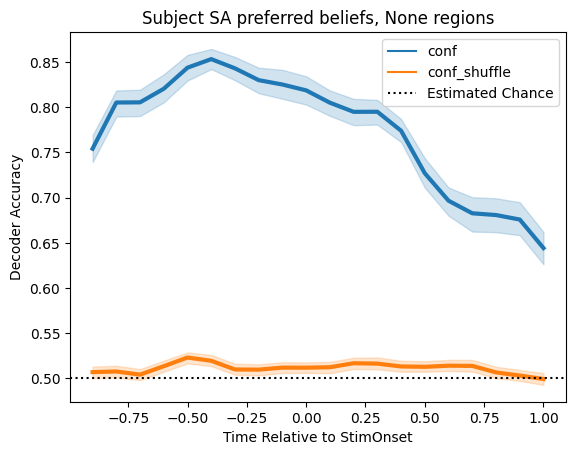

In [7]:
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.mode = "conf"
args.sig_unit_level = "belief_partition_95th"

res = belief_partitions_io.read_results(args, FEATURES)

fig, ax = plt.subplots()
visualization_utils.visualize_preferred_beliefs(args, res, ax, hue_col="mode")


Warning, shuffle not found: MAGENTA_pref_shuffle_0
Warning, shuffle not found: MAGENTA_pref_shuffle_3
Warning, shuffle not found: MAGENTA_pref_shuffle_6
Warning, shuffle not found: MAGENTA_pref_shuffle_7
Warning, shuffle not found: MAGENTA_pref_shuffle_9
Warning, shuffle not found: RIPPLE_pref_shuffle_9


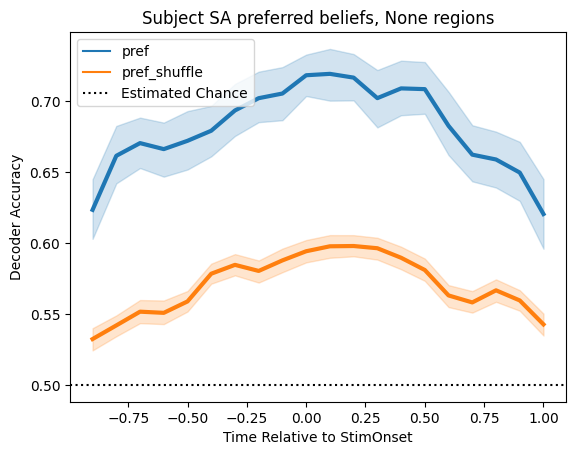

In [8]:
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.mode = "pref"
args.sig_unit_level = "belief_partition_95th"

res = belief_partitions_io.read_results(args, FEATURES)

fig, ax = plt.subplots()
visualization_utils.visualize_preferred_beliefs(args, res, ax, hue_col="mode")


Warning, shuffle not found: MAGENTA_pref_shuffle_7
Warning, shuffle not found: MAGENTA_pref_shuffle_9
Warning, shuffle not found: RIPPLE_pref_shuffle_9


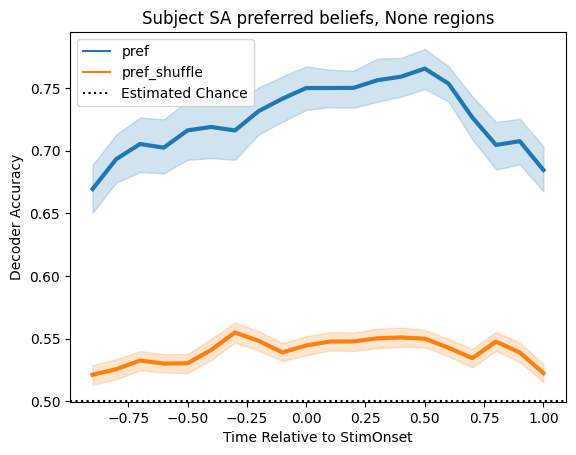

In [9]:
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.mode = "pref"
args.sig_unit_level = "belief_pref_95th"

res = belief_partitions_io.read_results(args, FEATURES)

fig, ax = plt.subplots()
visualization_utils.visualize_preferred_beliefs(args, res, ax, hue_col="mode")
